### Multiple Linear Regression Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('forestfires.csv')

In [3]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


Problem Statement: It is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

In [4]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
data.duplicated().sum()

4

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(513, 13)

In [9]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [10]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [11]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

# copy the og dataframe
df = data.copy()

# one-hot encoding
data = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)

Observation: Used one-hot encoding as they don't have continuous values.

In [13]:
boolean_cols = data.select_dtypes(include=['bool'])
for col in boolean_cols.columns:
    data[col] = data[col].astype(int)

In [14]:
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


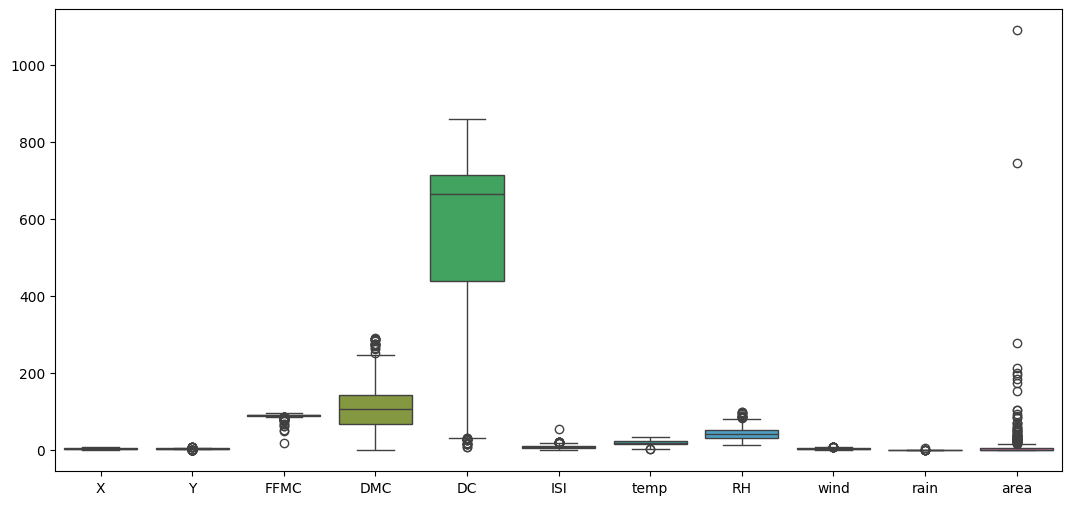

In [15]:
plt.figure(figsize=(13,6))
sns.boxplot(data=df)
plt.show()

### Handling Outliers

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outlier_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'RH', 'wind', 'rain']
for col in outlier_columns:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in FFMC: 53
Outliers in DMC: 17
Outliers in DC: 17
Outliers in ISI: 14
Outliers in RH: 12
Outliers in wind: 13
Outliers in rain: 8


Observation: Since my goal is to predict the burned area of forest fires, removing outliers could impact important patterns in extreme fire events. Some meteorological variables like rain, wind, RH have high variability, so getting rid of outliers wouldn't be ideal.

Therefore, i will handlie them by using robust scaler.

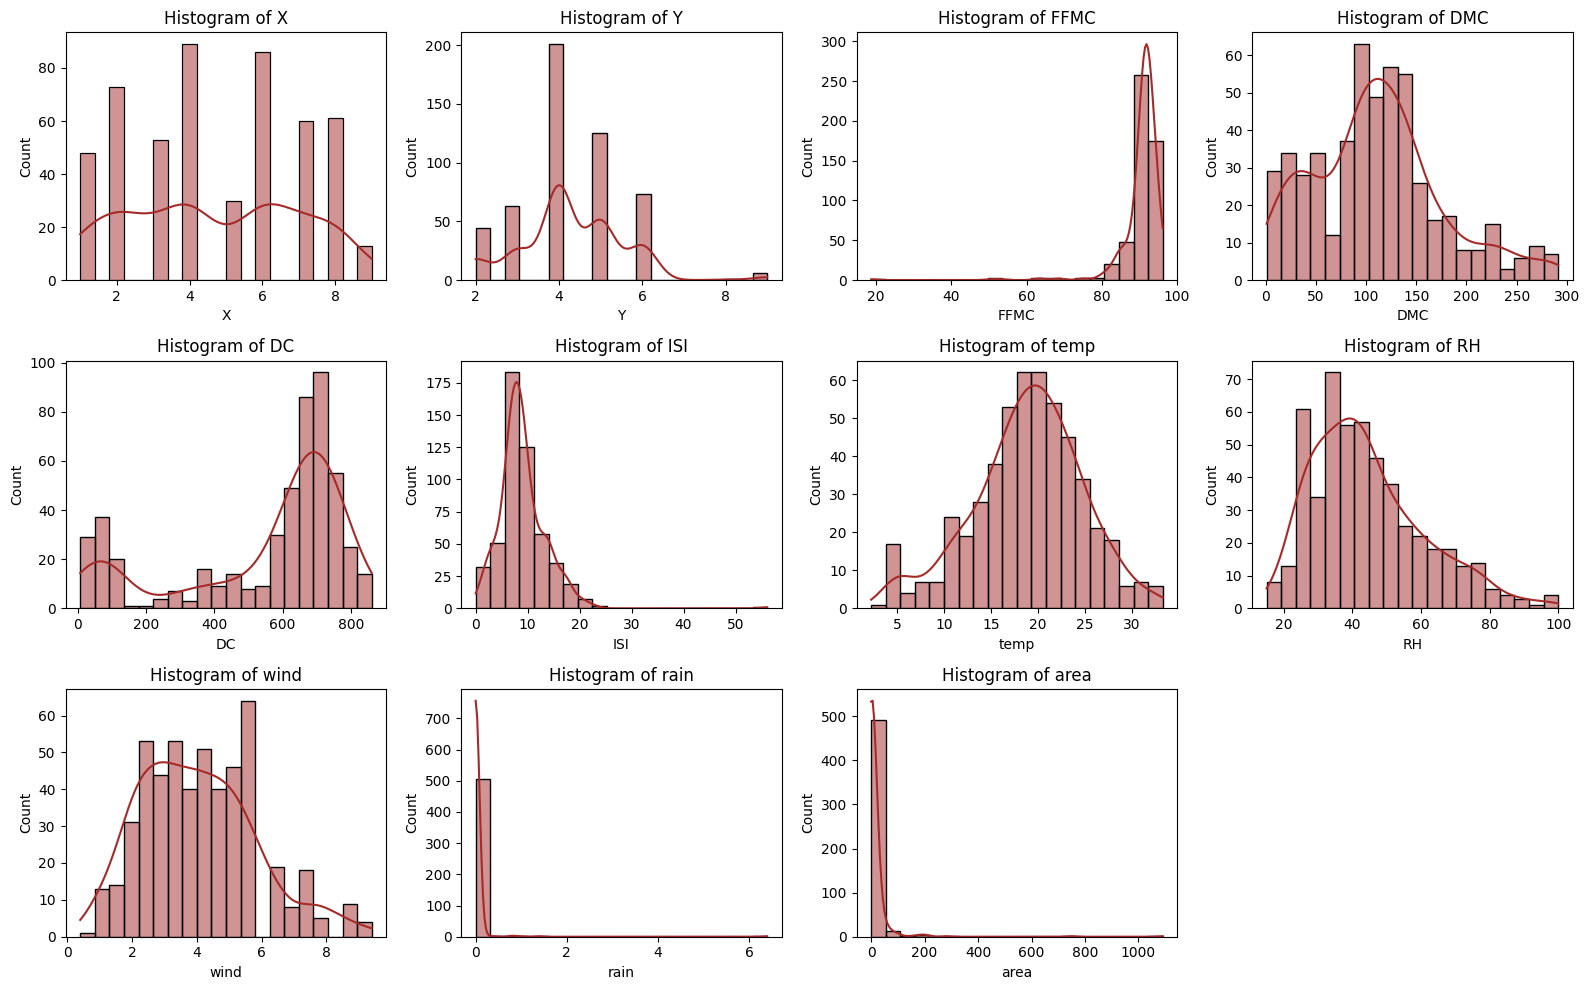

In [17]:
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(16,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[col], kde=True, bins=20, color='brown')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()

Observation:
- temp, DMC, wind, RH, ISI are roughly bell-shaped, aa slight skewness may not be significant but can still affect modeling if assumptions of normality are important.
- FFMC, DC are right skewed.
- rain values are always positive, but most observations show little to no rainfall.
- area is the target value

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame({'Feature': data.columns,
                       'VIF': [vif(data.values, i) for i in range(data.shape[1])]})

vif_df

,Feature,VIF
0,X,7.806952
1,Y,19.925722
2,FFMC,132.591391
3,DMC,14.679053
4,DC,156.592192
5,ISI,7.872446
6,temp,47.688395
7,RH,19.062288
8,wind,7.398733
9,rain,1.078353


Observation:
- Dropping FFMC and DC as it has more than 100 of VIF.


In [19]:
data.drop(['FFMC', 'DC'], axis=1, inplace=True)

vif_df = pd.DataFrame({'Feature': data.columns,
                       'VIF': [vif(data.values, i) for i in range(data.shape[1])]})
vif_df

,Feature,VIF
0,X,7.706694
1,Y,19.353986
2,DMC,9.149229
3,ISI,6.987436
4,temp,32.242515
5,RH,14.167335
6,wind,7.038805
7,rain,1.063392
8,area,1.077956
9,month_aug,25.895012


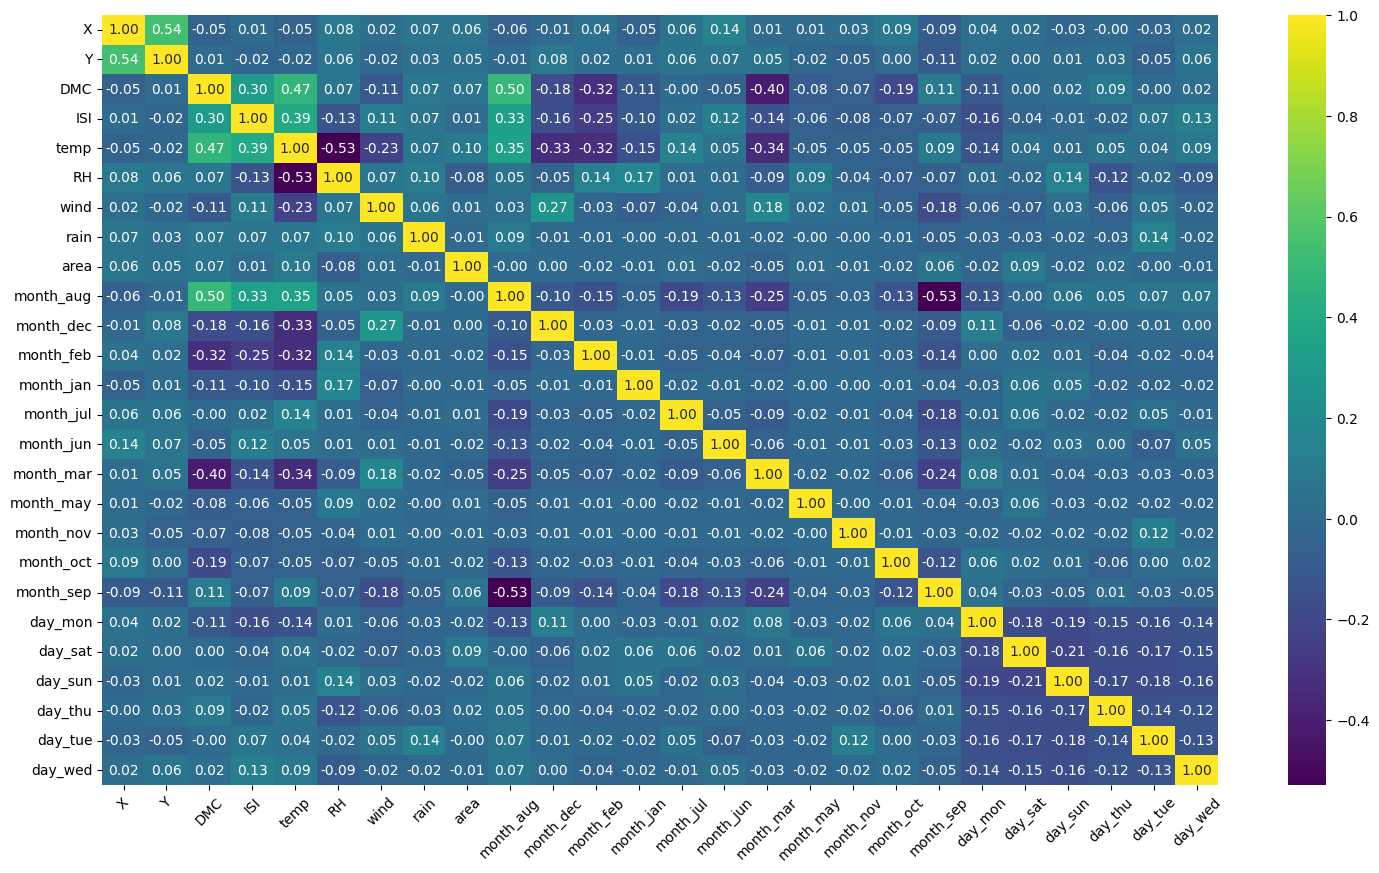

In [20]:
corr = data.corr()

plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.xticks(rotation=45)
plt.yticks()
plt.show()

Observation:
- temp has a strong correlation with RH and ISI, so dropping temp.
- month_aug also has a strong correlation with DMC and momth_sep, so dropping month_aug.
- rain has values close to zero across most categories so dropping rain.

In [21]:
data.drop(['temp', 'month_aug', 'rain'], axis=1, inplace=True)

vif_df = pd.DataFrame({'Feature': data.columns,
                       'VIF': [vif(data.values, i) for i in range(data.shape[1])]})
vif_df

,Feature,VIF
0,X,7.641777
1,Y,16.868075
2,DMC,6.812599
3,ISI,5.777237
4,RH,8.675177
5,wind,6.752518
6,area,1.075871
7,month_dec,1.339468
8,month_feb,1.417335
9,month_jan,1.106795


### Feature Scaling

In [23]:
X = data.drop('area', axis=1)
Y = data['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_scaled = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test, columns=X.columns)

X_scaled

,X,Y,DMC,ISI,RH,wind,month_dec,month_feb,month_jan,month_jul,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
324,6,5,53.3,5.4,56,1.8,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
333,1,4,87.7,9.5,54,3.1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
175,1,4,96.9,8.9,39,4.9,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
275,4,6,26.4,2.0,61,4.9,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
496,4,5,175.5,16.8,26,3.1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,4,5,88.0,7.1,45,3.1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
273,4,6,27.2,6.8,57,8.5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
352,7,4,99.0,9.6,43,3.6,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
439,1,3,91.3,7.2,46,2.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Linear Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_evaluation (model, X_scaled, X_test_scaled, Y_train, Y_test):

    model.fit(X_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R2 coefficient:", r2)

lr = LinearRegression()
model_evaluation(lr, X_scaled, X_test_scaled, Y_train, Y_test)


Mean Absolute Error: 16.204809984043766
Mean Squared Error: 528.3086424266843
Root Mean Squared Error: 22.984965573754604
R2 coefficient: -0.3718746640374839


Observation:
- rmse has a large value of almost 23, suggesting the model's predictions are not very accurate.
- r2 has a negative value, indicating the model is not performing well. It means that the model is worse than a simple mean-based model.

### 60/40 split

In [28]:
X_train_60, X_test_60, Y_train_60, Y_test_60 = train_test_split(X, Y, test_size=0.4, random_state=42)

X_scaled_60 = scaler.fit_transform(X_train_60)
X_test_scaled_60 = scaler.transform(X_test_60)

model_evaluation(lr, X_scaled_60, X_test_scaled_60, Y_train_60, Y_test_60)

Mean Absolute Error: 24.17627239199601
Mean Squared Error: 1449.8060379807328
Root Mean Squared Error: 38.076318598056886
R2 coefficient: -0.7297896648211388


Observation: 
- The second model (60/40) has more rmse than the first model.
- The second model has lower r2 score than the first model.

Conclusion: The better model between two models is the first split (80/20).